In [1]:
%matplotlib inline

import mne
from mne.channels import find_ch_connectivity, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test

from config import (fname,
                    subject_ids, 
                    sessions, 
                    subj_interv, 
                    subj_control, 
                     all_evokeds_interv_1, 
                     all_evokeds_interv_2, 
                     all_evokeds_control_1, 
                     all_evokeds_control_2)

import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt


/home/claire/.local/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Compute grand average ERP at the group/ session level

In [2]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_pv(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))


        for idx, evoked in enumerate(evokeds):
            evoked.apply_baseline((None, 0))

            if subj in subj_interv:
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_interv_1)
                    all_evokeds_interv_1[idx].append(evoked)
                    
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_interv_2)
                    all_evokeds_interv_2[idx].append(evoked)
                
            elif subj in subj_control:
    
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_control_1)
                    all_evokeds_control_1[idx].append(evoked)
                
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_control_2)
                    all_evokeds_control_2[idx].append(evoked)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-146/ses-1/eeg//sub-146_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: 

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 32 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 33 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-172/ses-2/eeg//sub-172_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1

        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-276/ses-1/eeg//sub-276_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of inte

        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type =

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-330/ses-2/eeg//sub-330_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 36 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-428/ses-1/eeg//sub-428_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 74 - aspect type

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/pa

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
       

        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-562/ses-1/eeg//sub-562_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for thi

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
     

        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-594/ses-2/eeg//sub-594_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 75 - aspect 

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
A

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-690/ses-1/eeg//sub-690_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms 

        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: me

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-726/ses-2/eeg//sub-726_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 68 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 74 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: 

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-750/ses-1/eeg//sub-750_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1

        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-786/ses-2/eeg//sub-786_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of inte

In [31]:
all_evokeds_interv_1


[[<Evoked  |  'hw' (average, N=82), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=68), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=82), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=75), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=82), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=48), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=80), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=78), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=81), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=77), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=82), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=71), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=79), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=80), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked  |  'hw' (average, N=79), [-1, 1] sec, 32 ch, ~213 kB>,
  <Evoked 

Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: mean)
Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: mean)


In [3]:
# Computing the differences at the individual level then group level    
# T1
hw_lpp_pre_test=mne.combine_evoked([mne.grand_average(all_evokeds_interv_1[3]), 
                                    mne.grand_average(all_evokeds_control_1[3])],
                                    weights=(-1,1)).apply_baseline((None,0))

#T2    
hw_lpp_post_test=mne.combine_evoked([mne.grand_average(all_evokeds_interv_2[3]), 
                                    mne.grand_average(all_evokeds_control_2[3])],
                                    weights=(-1,1)).apply_baseline((None,0))
   
hw_lpp_pre_test.comment ='lpp diff ctr vs int at T1'

hw_lpp_post_test.comment= 'lpp diff ctr vs int at T2'

#difference between (CTR-INT) at T1 and (CTR-INT) at T2
hw_lpp_diff =mne.combine_evoked([-hw_lpp_pre_test, hw_lpp_post_test], 'nave')



# Computing the differences T2-T1 for each group
hw_lpp_pre_test_INT=mne.combine_evoked([mne.grand_average(all_evokeds_interv_1[3]), 
                                    mne.grand_average(all_evokeds_interv_2[3])],
                                    weights=(-1,1)).apply_baseline((None,0))


hw_lpp_pre_test_CTR=mne.combine_evoked([mne.grand_average(all_evokeds_control_1[3]), 
                                    mne.grand_average(all_evokeds_control_2[3])],
                                    weights=(-1,1)).apply_baseline((None,0))


Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: mean)
Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: mean)
Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: mean)
Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: mean)


# Plot ERP to neutral and HW pictures



Intervention group

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-4-51a688efbd35>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


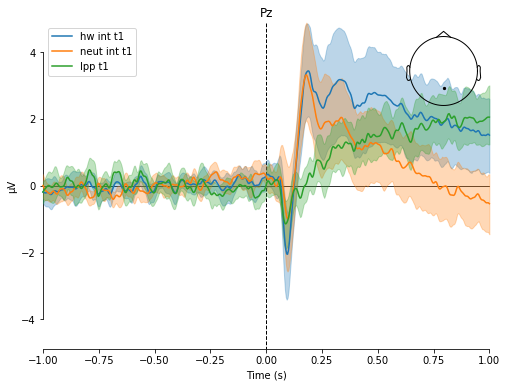

[<Figure size 576x432 with 2 Axes>]

In [4]:
mne.viz.plot_compare_evokeds(
                {'hw int t1':all_evokeds_interv_1[0], 
                'neut int t1':all_evokeds_interv_1[2], 
                 'lpp t1': all_evokeds_interv_1[3]  }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-5-af5a6a565729>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


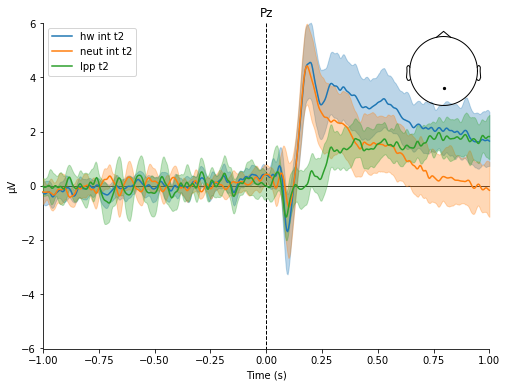

[<Figure size 576x432 with 2 Axes>]

In [5]:
mne.viz.plot_compare_evokeds(
                {'hw int t2':all_evokeds_interv_2[0], 
                'neut int t2':all_evokeds_interv_2[2], 
                 'lpp t2': all_evokeds_interv_2[3]  }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

control group

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-35-25f08886dab0>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


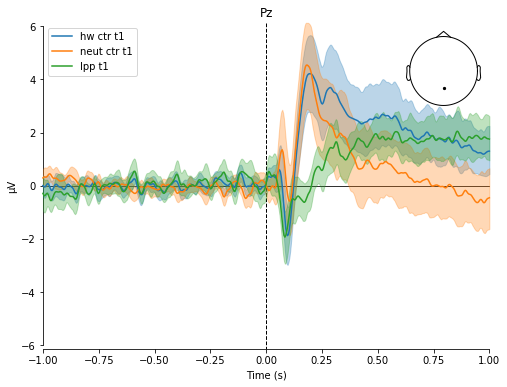

[<Figure size 576x432 with 2 Axes>]

In [35]:
mne.viz.plot_compare_evokeds(
                {'hw ctr t1':all_evokeds_control_1[0], 
                'neut ctr t1':all_evokeds_control_1[2], 
                 'lpp t1': all_evokeds_control_1[3]  }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-36-055a6a265402>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


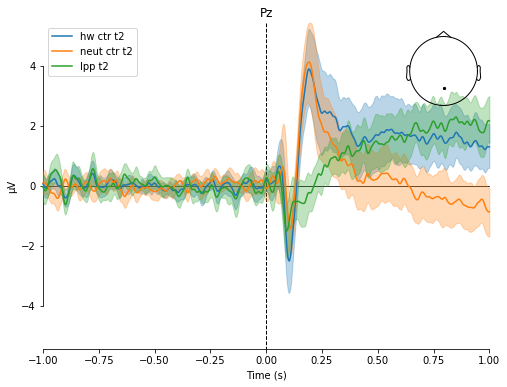

[<Figure size 576x432 with 2 Axes>]

In [36]:
mne.viz.plot_compare_evokeds(
                {'hw ctr t2':all_evokeds_control_2[0], 
                'neut ctr t2':all_evokeds_control_2[2], 
                 'lpp t2': all_evokeds_control_2[3]  }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

Groupes difference between test and re-test in LPP amplitude in response to health warning stimuli
-----------------------------------------------------




combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-7-b33f1399ece3>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


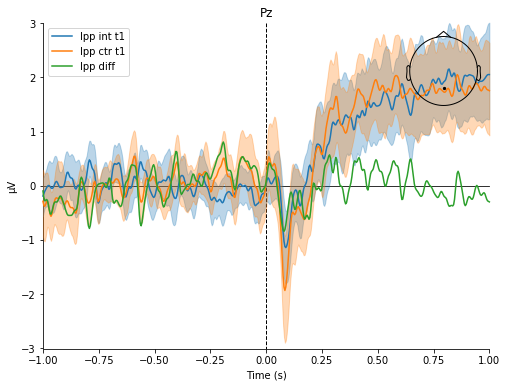

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-7-b33f1399ece3>:16: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


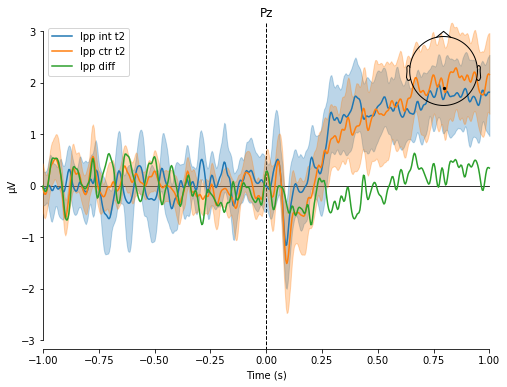

In [7]:
diff_t1= mne.viz.plot_compare_evokeds(
                {'lpp int t1':all_evokeds_interv_1[3], 
                'lpp ctr t1':all_evokeds_control_1[3], 
                 'lpp diff': hw_lpp_pre_test  }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

diff_t2= mne.viz.plot_compare_evokeds(
                { 'lpp int t2':all_evokeds_interv_2[3],
                 'lpp ctr t2':all_evokeds_control_2[3], 
                'lpp diff': hw_lpp_post_test }, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

diff_t1[0].savefig(fname.figures_pv + 'erp_lpp_diff_t1.png')
diff_t2[0].savefig(fname.figures_pv + 'erp_lpp_diff_t2.png')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-27-3dfd50014994>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


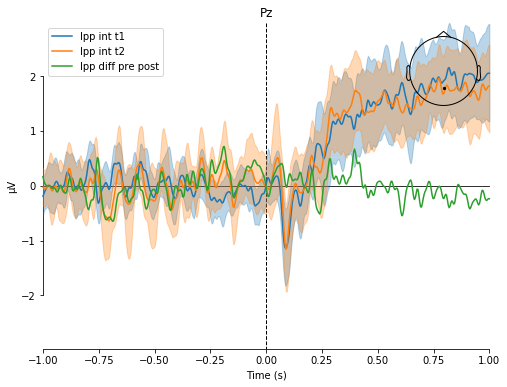

[<Figure size 576x432 with 2 Axes>]

In [27]:
mne.viz.plot_compare_evokeds(
                {'lpp int t1':all_evokeds_interv_1[3], 
                 'lpp int t2':all_evokeds_interv_2[3],
                'lpp diff pre post': hw_lpp_pre_test_INT}, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


<ipython-input-29-08880e6cea8f>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ci=.95


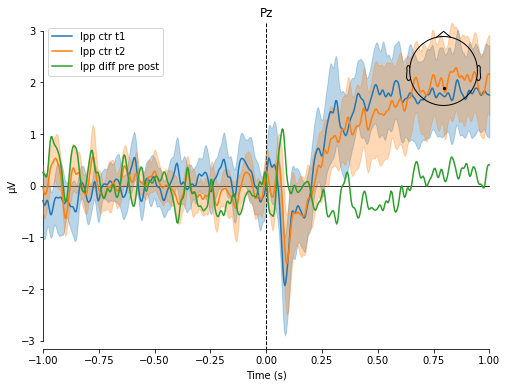

[<Figure size 576x432 with 2 Axes>]

In [29]:
mne.viz.plot_compare_evokeds(
                {'lpp ctr t1':all_evokeds_control_1[3], 
                 'lpp ctr t2':all_evokeds_control_2[3], 
                'lpp diff pre post': hw_lpp_pre_test_CTR}, 
                picks=[ 'Pz'],
                 combine='mean', 
                 ci=.95
                )

computing the difference between control and intervention for each session

# LPP Latency onset


In [2]:
import my_jackknife_latency as mjack
import numpy as np
from scipy.integrate import cumtrapz

In [3]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_pv(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))


        for idx, evoked in enumerate(evokeds):
            evoked.apply_baseline((None, 0))

            if subj in subj_interv:
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_interv_1)
                    all_evokeds_interv_1[idx].append(evoked)
                    
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_interv_2)
                    all_evokeds_interv_2[idx].append(evoked)
                
            elif subj in subj_control:
    
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_control_1)
                    all_evokeds_control_1[idx].append(evoked)
                
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_control_2)
                    all_evokeds_control_2[idx].append(evoked)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-146/ses-1/eeg//sub-146_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode:

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 32 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 33 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-172/ses-2/eeg//sub-172_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    

        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-276/ses-1/eeg//sub-276_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of int

        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type =

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-330/ses-2/eeg//sub-330_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 36 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-428/ses-1/eeg//sub-428_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 74 - aspect typ

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//p

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
       

        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-562/ses-1/eeg//sub-562_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for th

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
     

        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-594/ses-2/eeg//sub-594_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 75 - aspect

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
A

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-690/ses-1/eeg//sub-690_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms

        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: me

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-726/ses-2/eeg//sub-726_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 68 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 74 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode:

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-750/ses-1/eeg//sub-750_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    

        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-786/ses-2/eeg//sub-786_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of int

In [4]:
elecs= ['Pz']

In [5]:

# lpp to health warning pictures
all_lpp_hw=[all_evokeds_control_1[3], all_evokeds_control_2[3], 
            all_evokeds_interv_1[3], all_evokeds_interv_2[3]]

# lpp to negative stimuli
all_lpp_neg=[all_evokeds_control_1[4], all_evokeds_control_2[4], 
             all_evokeds_interv_1[4], all_evokeds_interv_2[4]]

 

# compute successive group averaged erps using leave one out
gd_erp_lpp_hw= mjack.get_average_erp_leave_one_out(all_lpp_hw, len(all_lpp_hw), elecs)  


gd_erp_lpp_neg= mjack.get_average_erp_leave_one_out(all_lpp_neg, len(all_lpp_neg), elecs)  
  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([0]))
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (m

[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([7]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21]), array([14]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([21]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean

[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([6]))
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       18, 19, 20, 21]), array([16]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([1]))
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([8]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21]), array([15]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Identifying common channels ...
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,

[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([10]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21]), array([17]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([2]))
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([9]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([4]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 20, 21]), array([18]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([3]))
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
       18, 19, 20, 21]), array([13]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21]), array([20]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([5]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([12]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21]), array([19]))
Applying baseline correction (mode: mean

In [18]:
#gd_erp_lpp_hw[0][0].data = [y for x in gd_erp_lpp_hw[0][0].data for y in x]




In [6]:
toto=gd_erp_lpp_hw[0][1].copy().crop(0.255, 0.950)

Need more than one channel to make topography for eeg. Disabling interactivity.


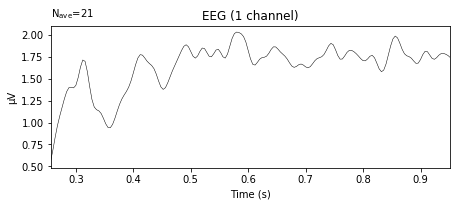

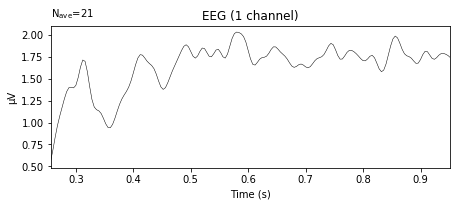

In [7]:
toto.plot()

In [8]:
min(np.absolute(np.cumsum(toto.data)-sum(toto.data)/2))

2.787717943088225e-07

In [9]:
np.argmin(np.absolute(np.cumsum(toto.data)-sum(toto.data)/2))

0

In [11]:
toto.data[0]

array([5.57543589e-07, 6.85257979e-07, 8.33463672e-07, 9.66342278e-07,
       1.07534817e-06, 1.17343492e-06, 1.26986889e-06, 1.35266428e-06,
       1.39886146e-06, 1.40323303e-06, 1.39582350e-06, 1.42417581e-06,
       1.51239382e-06, 1.63181030e-06, 1.71396407e-06, 1.69929656e-06,
       1.58186867e-06, 1.41333053e-06, 1.26442610e-06, 1.17765749e-06,
       1.14684170e-06, 1.13385794e-06, 1.10374391e-06, 1.04842004e-06,
       9.85946562e-07, 9.43812373e-07, 9.40919505e-07, 9.79635068e-07,
       1.04863610e-06, 1.12999258e-06, 1.20651667e-06, 1.26777426e-06,
       1.31374689e-06, 1.35446119e-06, 1.40453771e-06, 1.47491648e-06,
       1.56513306e-06, 1.66040065e-06, 1.73701526e-06, 1.77480972e-06,
       1.76965423e-06, 1.73688460e-06, 1.70029165e-06, 1.67382178e-06,
       1.65155576e-06, 1.61525873e-06, 1.55324133e-06, 1.47475117e-06,
       1.40730818e-06, 1.37855083e-06, 1.39812869e-06, 1.45388389e-06,
       1.52322885e-06, 1.58904040e-06, 1.64724806e-06, 1.70327829e-06,
      

In [112]:
np.absolute(cumtrapz(toto.data, toto.times)-

array([[2.67987537e-09, 5.90577811e-09, 9.67671539e-09, 1.38972745e-08,
        1.84668056e-08, 2.33339496e-08, 2.84722037e-08, 3.38150656e-08,
        3.92350280e-08, 4.46107760e-08, 4.99313425e-08, 5.53315226e-08,
        6.09994140e-08, 6.70095817e-08, 7.32156528e-08, 7.92990526e-08,
        8.49457461e-08, 9.00196547e-08, 9.46082077e-08, 9.89194285e-08,
        1.03120963e-07, 1.07245526e-07, 1.11221771e-07, 1.14986441e-07,
        1.18580693e-07, 1.22158254e-07, 1.25907973e-07, 1.29958221e-07,
        1.34332650e-07, 1.38976152e-07, 1.43816669e-07, 1.48813381e-07,
        1.53968686e-07, 1.59316874e-07, 1.64912068e-07, 1.70817724e-07,
        1.77080642e-07, 1.83686966e-07, 1.90531905e-07, 1.97444197e-07,
        2.04267407e-07, 2.10940650e-07, 2.17506974e-07, 2.24037539e-07,
        2.30538900e-07, 2.36928645e-07, 2.43102279e-07, 2.49031077e-07,
        2.54803824e-07, 2.60579731e-07, 2.66500220e-07, 2.72634507e-07,
        2.78991063e-07, 2.85564142e-07, 2.92364064e-07, 2.994101

In [110]:
?searchsorted()

Object `searchsorted` not found.


In [106]:
toto.data

array([[6.05941630e-07, 7.33996055e-07, 8.78955312e-07, 1.00651333e-06,
        1.10376625e-06, 1.18099925e-06, 1.25257277e-06, 1.31655428e-06,
        1.35487667e-06, 1.35510451e-06, 1.33276950e-06, 1.32751375e-06,
        1.37257631e-06, 1.46136940e-06, 1.54371444e-06, 1.55932109e-06,
        1.48237883e-06, 1.34096794e-06, 1.19598635e-06, 1.09829014e-06,
        1.05732026e-06, 1.04344677e-06, 1.01883513e-06, 9.69287308e-07,
        9.13047767e-07, 8.84078125e-07, 9.04702293e-07, 9.70156972e-07,
        1.05496722e-06, 1.13224740e-06, 1.18950339e-06, 1.23075532e-06,
        1.26760058e-06, 1.31005181e-06, 1.36404213e-06, 1.43355497e-06,
        1.51927292e-06, 1.61218605e-06, 1.69097605e-06, 1.73149335e-06,
        1.72465286e-06, 1.68695214e-06, 1.64966934e-06, 1.63349289e-06,
        1.63178955e-06, 1.61889094e-06, 1.57598134e-06, 1.51083580e-06,
        1.45356333e-06, 1.43280977e-06, 1.45514406e-06, 1.50510046e-06,
        1.56204281e-06, 1.61623531e-06, 1.67030439e-06, 1.729656

In [101]:
np.where(toto.times==lat)

(array([], dtype=int64),)

In [102]:
dataShifted = toto.data - lat # substract onsetcutoff from data to find where it reaches 0

In [103]:
dataShifted

array([[3.02970815e-07, 4.31025241e-07, 5.75984497e-07, 7.03542513e-07,
        8.00795437e-07, 8.78028439e-07, 9.49601956e-07, 1.01358347e-06,
        1.05190585e-06, 1.05213369e-06, 1.02979869e-06, 1.02454293e-06,
        1.06960550e-06, 1.15839859e-06, 1.24074363e-06, 1.25635027e-06,
        1.17940801e-06, 1.03799712e-06, 8.93015533e-07, 7.95319321e-07,
        7.54349447e-07, 7.40475960e-07, 7.15864314e-07, 6.66316493e-07,
        6.10076952e-07, 5.81107310e-07, 6.01731478e-07, 6.67186157e-07,
        7.51996408e-07, 8.29276590e-07, 8.86532576e-07, 9.27784501e-07,
        9.64629765e-07, 1.00708100e-06, 1.06107131e-06, 1.13058415e-06,
        1.21630211e-06, 1.30921524e-06, 1.38800524e-06, 1.42852254e-06,
        1.42168205e-06, 1.38398133e-06, 1.34669852e-06, 1.33052207e-06,
        1.32881874e-06, 1.31592013e-06, 1.27301052e-06, 1.20786499e-06,
        1.15059252e-06, 1.12983896e-06, 1.15217324e-06, 1.20212965e-06,
        1.25907199e-06, 1.31326450e-06, 1.36733358e-06, 1.426685

In [105]:
from scipy import interpolate
interpolator = interpolate.UnivariateSpline(np.arange(0.256,0.951,1./250),dataShifted,s=250)   # interpolate points
            
print(interpolator.roots())
latency_onsetCutOff= interpolator.roots().mean()

ValueError: 0-th dimension must be fixed to 174 but got 175 (real index=1)


In [21]:
gd_erp_lpp_hw[0][0].times

array([-1.   , -0.996, -0.992, -0.988, -0.984, -0.98 , -0.976, -0.972,
       -0.968, -0.964, -0.96 , -0.956, -0.952, -0.948, -0.944, -0.94 ,
       -0.936, -0.932, -0.928, -0.924, -0.92 , -0.916, -0.912, -0.908,
       -0.904, -0.9  , -0.896, -0.892, -0.888, -0.884, -0.88 , -0.876,
       -0.872, -0.868, -0.864, -0.86 , -0.856, -0.852, -0.848, -0.844,
       -0.84 , -0.836, -0.832, -0.828, -0.824, -0.82 , -0.816, -0.812,
       -0.808, -0.804, -0.8  , -0.796, -0.792, -0.788, -0.784, -0.78 ,
       -0.776, -0.772, -0.768, -0.764, -0.76 , -0.756, -0.752, -0.748,
       -0.744, -0.74 , -0.736, -0.732, -0.728, -0.724, -0.72 , -0.716,
       -0.712, -0.708, -0.704, -0.7  , -0.696, -0.692, -0.688, -0.684,
       -0.68 , -0.676, -0.672, -0.668, -0.664, -0.66 , -0.656, -0.652,
       -0.648, -0.644, -0.64 , -0.636, -0.632, -0.628, -0.624, -0.62 ,
       -0.616, -0.612, -0.608, -0.604, -0.6  , -0.596, -0.592, -0.588,
       -0.584, -0.58 , -0.576, -0.572, -0.568, -0.564, -0.56 , -0.556,
      

now we compute the fractional latency peak (= latency at which the erp amplitude reaches a % of its peak amplitude )

In [15]:
    
tmin, tmax = 0.25, 1.0 #0.30
peak_frac=0.5 # fractional latencu peak 
      

lpp_peak_onset_hw, lpp_amp_hw, lpp_peak_lat_hw = mjack.get_frac_peak_latency(gd_erp_lpp_hw, 
                                                n_group= len(all_lpp_hw), 
                                                tmin=tmin, tmax=tmax, 
                                                peak_frac=peak_frac, sfreq=250)


lpp_peak_onset_neg, lpp_amp_neg, lpp_peak_lat_neg = mjack.get_frac_peak_latency(gd_erp_lpp_neg, 
                                                 n_group= len(all_lpp_neg), 
                                                 tmin=tmin, tmax=tmax, 
                                                 peak_frac=peak_frac, sfreq=250)

[0.44679178]
[0.39471537]
[0.41271441]
[0.399553]
[0.36246675]
[0.38035875]
[0.38398921]
[0.37901365]
[0.397123]
[0.42199027]
[0.43226352]
[0.39924376]
[0.41458706]
[0.40076655]
[0.4059943]
[0.38052763]
[0.41346623]
[0.41461754]
[0.39705942]
[0.40588156]
[0.39547483]
[0.38228087]
[0.49733261]
[0.53794397]
[0.51182014]
[0.49033762]
[0.51752326]
[0.5160044]
[0.49501689]
[0.50917632]
[0.51467822]
[0.54127955]
[0.52001352]
[0.50609248]
[0.54052497]
[0.52735005]
[0.50266666]
[0.50544672]
[0.53104894]
[0.5321641]
[0.505991]
[0.49553066]
[0.52325873]
[0.49794842]
[0.43070714]
[0.47182886]
[0.43909619]
[0.43627577]
[0.47560227]
[0.4272227]
[0.46366444]
[0.47953814]
[0.45572141]
[0.42258237]
[0.45252116]
[0.48072385]
[0.44567801]
[0.45260175]
[0.44769981]
[0.4698219]
[0.46361138]
[0.46240763]
[0.48117402]
[0.45406747]
[0.4554227]
[0.46895039]
[0.36097351]
[0.3663197]
[0.35685963]
[0.34710866]
[0.34970099]
[0.36044222]
[0.41756786]
[0.37381138]
[0.37442731]
[0.36346956]
[0.37996626]
[0.3504283]


In [16]:
all_ind_onset=[list() for _ in range(4)]
nsubj=len(subject_ids)

# smulder jackknife individual latencies
for idx in range(0, len(lpp_peak_onset_hw)):
    for n in range(0, len(subj_interv)): # number of pp per condition
                 ind_lat = nsubj*np.mean(lpp_peak_onset_hw[idx])-(nsubj-1)*lpp_peak_onset_hw[idx][n]
                 all_ind_onset[idx].append(ind_lat)

[[0.5800000000000001,
  0.5800000000000001,
  0.5800000000000001,
  0.5800000000000001,
  0.944,
  0.5840000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.5800000000000001,
  0.8560000000000001,
  0.5800000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.8560000000000001,
  0.5800000000000001],
 [0.8520000000000001,
  0.8480000000000001,
  0.8480000000000001,
  0.8520000000000001,
  0.8520000000000001,
  0.8520000000000001,
  0.8480000000000001,
  0.8520000000000001,
  0.8520000000000001,
  0.8480000000000001,
  0.8520000000000001,
  0.8480000000000001,
  0.8280000000000001,
  0.9319999999999999,
  0.8520000000000001,
  0.8520000000000001,
  0.8520000000000001,
  0.8520000000000001,
  0.8520000000000001,
  0.8480000000000001,
  0.8520000000000001,
  0.8480000000000001],
 [0.8200000000000001,
  0.8200000000000001,

In [9]:
# create a dataframe
d_hw={'CTR1': lpp_peak_onset_hw[0], 'CTR2':lpp_peak_onset_hw[1],
   'INT1':lpp_peak_onset_hw[2], 'INT2':lpp_peak_onset_hw[3]}

df_hw=pd.concat([pd.Series(v, name=k) for k, v in d_hw.items()], axis=1)
df_hw['id']=df_hw.index
df_hw_long=pd.wide_to_long(df_hw, ["CTR", "INT"], i='id', j="Time")
df_hw_long= pd.melt(df_hw_long.reset_index(), id_vars=['id', 'Time'], 
                 value_vars=['CTR', 'INT'], 
                 var_name='Groupe', 
                 value_name='Latency')



d_neg={'CTR1': lpp_peak_onset_neg[0], 'CTR2':lpp_peak_onset_neg[1],
   'INT1':lpp_peak_onset_neg[2], 'INT2':lpp_peak_onset_neg[3]}

df_neg=pd.concat([pd.Series(v, name=k) for k, v in d_neg.items()], axis=1)
df_neg['id']=df_neg.index
df_neg_long=pd.wide_to_long(df_neg, ["CTR", "INT"], i='id', j="Time")
df_neg_long= pd.melt(df_neg_long.reset_index(), id_vars=['id', 'Time'], 
                 value_vars=['CTR', 'INT'], 
                 var_name='Groupe', 
                 value_name='Latency')

check for normality of the data

In [10]:
pg.normality(df_hw_long, group='Groupe', dv='Latency')

,W,pval,normal
CTR,0.860552,0.000082,False
INT,0.893049,0.000670,False


In [11]:
pg.normality(df_neg_long, group='Groupe', dv='Latency')

,W,pval,normal
CTR,0.833253,1.682574e-05,False
INT,0.758411,4.070666e-07,False


LPP to Health Warning stimuli

([<matplotlib.axis.XTick at 0x7f6668ae4e10>,
 <a list of 2 Text xticklabel objects>)

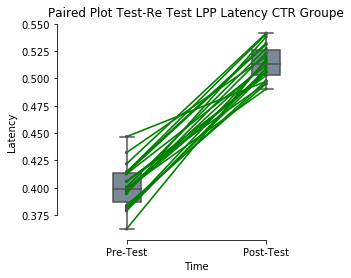

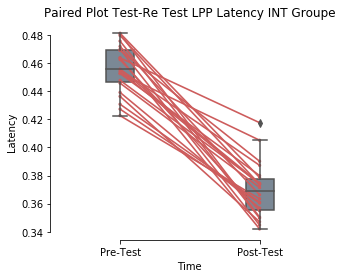

In [12]:
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 4)) 

df_ctr=df_hw_long.query("Groupe == 'CTR'")
ctr_plot=pg.plot_paired(data=df_ctr, dv='Latency', within='Time', subject= 'id', ax=ax1)
 
plt.title('Paired Plot Test-Re Test LPP Latency CTR Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 4)) 

df_int=df_hw_long.query("Groupe == 'INT'")
int_plot = pg.plot_paired(data=df_int, dv='Latency', within='Time', subject= 'id', ax=ax2)

plt.title('Paired Plot Test-Re Test LPP Latency INT Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

#fig1.savefig(fname.figures_pv + '/lpp_hw_ctr_latency.png')
#fig2.savefig(fname.figures_pv + '/lpp_hw_int_latency.png')

LPP to Negative Stimuli

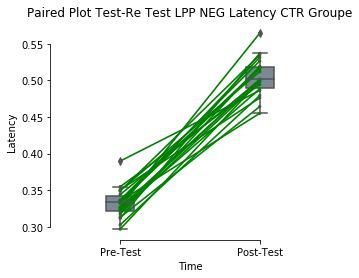

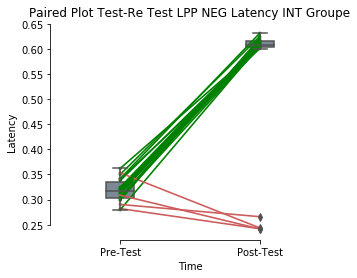

In [13]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 4)) 
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 4)) 

df_ctr_neg=df_neg_long.query("Groupe == 'CTR'")
ctr_plot=pg.plot_paired(data=df_ctr_neg, dv='Latency', within='Time', subject= 'id', ax=ax1)
 
plt.title('Paired Plot Test-Re Test LPP NEG Latency CTR Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 4)) 

df_int_neg=df_neg_long.query("Groupe == 'INT'")
int_plot = pg.plot_paired(data=df_int_neg, dv='Latency', within='Time', subject= 'id', ax=ax2)

plt.title('Paired Plot Test-Re Test LPP NEG Latency INT Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])


fig1.savefig(fname.figures_pv + '/lpp_neg_ctr_latency.png')
fig2.savefig(fname.figures_pv + '/lpp_neg_int_latency.png')


The data are not normal, we need to use non-parametric alternatives to mixed anova
We are going to use robust stats function from Rand Wilcox's R package WRS2

In [14]:
# export to csv to load in the R notebook
df_hw_long.to_csv('lat_hw.csv')

df_neg_long.to_csv('lat_neg.csv')



Stats - LPP Amplitude
=============================================

In [8]:
elecs= ['Pz', 'P3', 'P4'] # centroparietal electrodes (no CPz on montage)
index=['time']
all_df=[]


In [9]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_pv(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))
        
        lpp_evo=evokeds[3]
        df=[]
        
        df=lpp_evo.to_data_frame(index=index)[elecs]
        df['Subject']=str(subj)
        df['Session']= str(sess)    
        
        if subj in subj_interv:
            df['Groupe'] = 'int'

        elif subj in subj_control:
            df['Groupe'] = 'ctr'
        
        
        all_df.append(df)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-146/ses-1/eeg//sub-146_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: 

        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying b

        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. P

        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-278/ses-1/eeg//sub-278_ses-1_pv_ave.fif ...
    Found the da

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-295/ses-2/eeg//sub-295_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-365/ses-1/eeg//sub-365_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.

Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-388/ses-2/eeg//sub-388_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_

        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please

        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type =

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-562/ses-2/eeg//sub-562_ses-2

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-589/ses-1/eeg//sub-589_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method s

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-608/ses-2/eeg//sub-608_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.

Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-681/ses-1/eeg//sub-681_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_

        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please

        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type =

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-750/ses-1/eeg//sub-750_ses-1

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives/passive_viewing/sub-754/ses-2/eeg//sub-754_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
No projector specified for this dataset. Please consider the method s

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


In [10]:
# concatenate all dataframe
all_df=pd.concat(all_df)

#reset index to get time in a column
all_df = all_df.reset_index()

In [46]:
all_df

channel,time,Pz,P3,P4,Subject,Session,Groupe
0,-1000,-1.007902,-4.658791,2.084859,146,1,int
1,-996,-0.640680,-4.126853,2.188014,146,1,int
2,-992,-0.243716,-3.673152,2.315310,146,1,int
3,-988,0.192071,-3.121888,2.418693,146,1,int
4,-984,0.665637,-2.386485,2.450567,146,1,int
...,...,...,...,...,...,...,...
44083,984,1.782791,0.425930,0.072429,786,2,int
44084,988,1.708725,0.300698,-0.060506,786,2,int
44085,992,1.689949,0.255429,-0.155010,786,2,int
44086,996,1.651246,0.186357,-0.131725,786,2,int


In [11]:
all_df['Subject']=all_df.Subject.astype('str')
all_df['Session']=all_df.Session.astype('str')
all_df['Groupe']=all_df.Groupe.astype('str')

In [12]:
# select the LPP time window
all_df_lpp = all_df[(all_df['time']>=250) & (all_df['time']<=950)]

In [13]:
pg.normality(all_df_lpp, group='Groupe', dv='Pz')

/home/claire/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
int,0.996550,1.777882e-12,False
ctr,0.992409,7.163153e-20,False


The data are not normally distributed

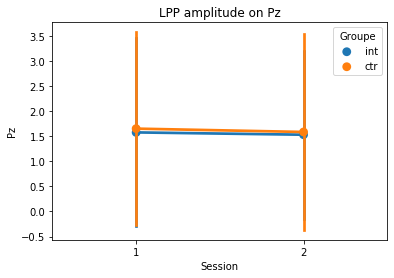

In [14]:
sns_fig = sns.pointplot(data=all_df_lpp, x= 'Session', y='Pz', ci='sd', hue='Groupe')


sns_fig.set_title('LPP amplitude on Pz')


fig=sns_fig.get_figure()

fig.savefig(fname.figures_pv  + 'erp_lpp_amp_plot_session.png')


In [49]:
all_df_lpp.to_csv('amp_lpp_hw.csv')